In [1]:
import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from src.assoc_utils_np import *
from src.sensory_utils import *
from src.data_utils import *
from src.senstranspose_utils import *
from src.theory_utils import *
from src.assoc_utils_np_2D import gen_gbook_2d
# from src.sens_pcrec_utils import *
#from src.sensgrid_utils import *
#from src.sens_sparseproj_utils import *

In [10]:
lambdas = [3,4,5]                   # module period
M = len(lambdas)                             # num modules
Ng = np.sum(np.square(lambdas))                             # num grid cells
Npos = np.prod(lambdas)   
Npos = Npos*Npos
gbook = gen_gbook([l**2 for l in lambdas],Ng,Npos)
Ns = Npos#84*84*3                           # num of sensory cells set at Npos, can be larger
Np_lst = [400] #np.arange(25, 425, 25)     # num place cells
pflip = 0.0                         #measure of noise injected in s (prob of flipping if binary, gaussian noise if cts)
Niter = 1                           # number of iterations for scaffold dynamics
nruns=1
sparsity=0        #Dummy param for older code, not used currently

###Use below lines for random binary patterns
sbook = np.sign(randn(Ns, Npos))

###Use below lines for cropped, BW imagenet as used for results in paper
# sbook = np.load('../../BW_miniimagenet_3600_60_60_full_rank.npy').reshape((3600,3600)).T  
# bw_mean = np.mean(sbook.flatten())
# sbook = sbook - bw_mean
# indices = np.concatenate([np.arange(i, 3600, 600) for i in range(600)])  #shuffle classes to prevent any class imbalance when doing first k patterns
# sbook = sbook[:,indices]

### Use below lines for regular miniimagenet
# c_miniimagenet = np.load("miniimagenet_3600_84_84_3.npy")
# sbook =c_miniimagenet.reshape((3600,84*84*3)).T
# c_images_avg = np.mean(sbook.flatten())
# sbook = sbook - c_images_avg
# indices = np.concatenate([np.arange(i, 3600, 600) for i in range(600)])  #shuffle classes to prevent any class imbalance when doing first k patterns
# sbook = sbook[:,indices]


Npatts_lst = np.arange(1,Npos+1,200)  # number of patterns to train on 

In [11]:
##Choose experiment to run

#Base case
err_pc, err_gc, err_sens, err_senscup, err_sensl1 = capacity(senstrans_gs_vectorized_patts, lambdas, Ng, Np_lst, pflip, Niter, Npos, 
                                          gbook, Npatts_lst, nruns, Ns, sbook, sparsity)

#Place states chosen to be random vectors with same sparsity as base case (teal curves in Fig. 3)
#err_pc, err_gc, err_sens, err_senscup, err_sensl1 = capacity(senstrans_gs_random_sparse_p, lambdas, Ng, Np_lst, pflip, Niter, Npos, 
                                          #gbook, Npatts_lst, nruns, Ns, sbook, sparsity)
#Assuming linear hippocampal activations
# err_pc, err_gc, err_sens, err_senscup, err_sensl1 = capacity(senstrans_gs_linear_p, lambdas, Ng, Np_lst, pflip, Niter, Npos, 
                                          # gbook, Npatts_lst, nruns, Ns, sbook, sparsity)
                                          
#Use gbook as a spiraling outward + linear activation (for SI Fig. S13)
# err_pc, err_gc, err_sens, err_senscup, err_sensl1 = capacity(senstrans_gs_linear_p_spiral, lambdas, Ng, Np_lst, pflip, Niter, Npos, 
                                          # gbook, Npatts_lst, nruns, Ns, sbook, sparsity)                                          

l = 0
thresh=0.5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [03:27<00:00, 11.54s/it]


(18, 1)
(1, 18, 1)


C:\Users\chand\AppData\Local\Temp\ipykernel_28496\172342969.py:13: RuntimeWarning: divide by zero encountered in log2
  S = - a * np.log2(a) - b * np.log2(b)
C:\Users\chand\AppData\Local\Temp\ipykernel_28496\172342969.py:13: RuntimeWarning: invalid value encountered in multiply
  S = - a * np.log2(a) - b * np.log2(b)


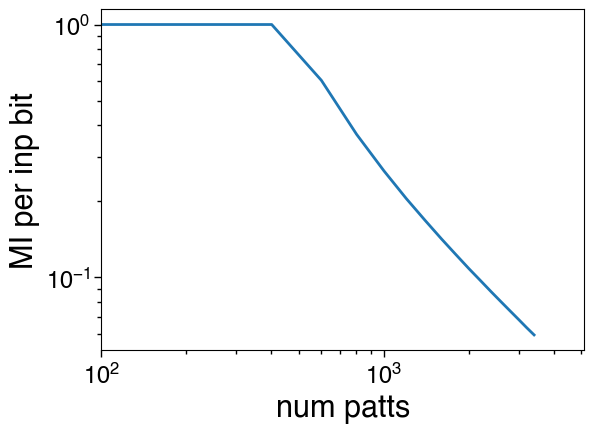

In [15]:
### FOR BINARY PATTS
normlizd_l1 = err_sensl1
Npatts = np.array(nruns*[Npatts_lst])   # Npatts_lst repeated nruns times
Npatts = Npatts.T
print(Npatts.shape)

m = 1 - (2*normlizd_l1) 
print(m.shape)

a = (1+m)/2
b = (1-m)/2

S = - a * np.log2(a) - b * np.log2(b)
S = np.where(m==1, np.zeros_like(S), S)

MI = 1 - S
plt.errorbar(Npatts_lst,MI[0].mean(axis=1),yerr=MI[0].std(axis=1),lw=2); plt.xscale('log'); plt.yscale('log');
plt.xlim(xmin=100)
plt.ylabel('MI per inp bit')
plt.xlabel('num patts')
plt.show()

### FOR CTS PATTS (miniimagenet_BW)
# m = err_sens
# plt.errorbar(Npatts_lst,m[0].mean(axis=1),yerr=m[0].std(axis=1)); #plt.xscale('log'); plt.yscale('log');
# plt.plot(np.linspace(Np_lst[0],max(Npatts_lst),10),np.sqrt(Np_lst[0]/np.linspace(Np_lst[0],max(Npatts_lst),10)),'k-')
# plt.ylabel('cosine sim')
# plt.xlabel('num patts')
# plt.show()


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:10<00:00,  4.30s/it]


(0.0, 1.0)

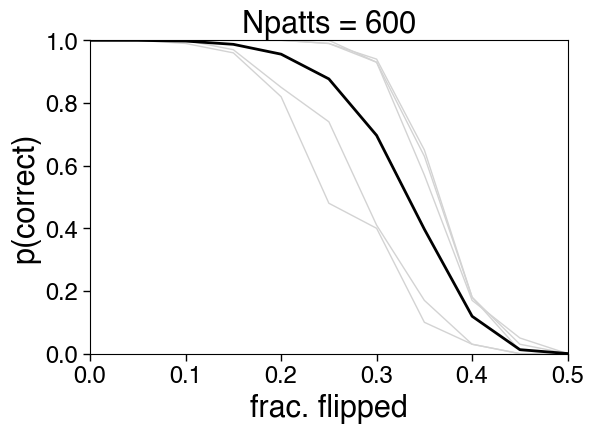

In [24]:
###Code to examine basin sizes

sbook = np.sign(np.random.normal(0,1,(np.prod(lambdas)**2,np.prod(lambdas)**2)))
nruns=1
Npatts=600
Wsp = pseudotrain_Wsp(sbook, pbook, Npatts)
Wps = pseudotrain_Wps(pbook, sbook, Npatts)

noise_vals = np.arange(0,0.55,0.05)
basin_runs = 100
correct = np.zeros((basin_runs,len(noise_vals),Npatts))
for bidx in tqdm(range(basin_runs)):
    # noise = np.random.normal(0,1,sinit.shape)
    for nidx,noise_val in enumerate((noise_vals)):
        sinit = sbook[:,:Npatts]
        sinit= sinit*np.sign(   np.random.uniform(0,1,size=sinit.shape) - noise_val  )
        pin = nonlin(Wps@sinit[:,:Npatts], thresh=0)
        gin = Wgp@pin
        g = gridCAN_2d(gin,lambdas)
        p = nonlin(Wpg@g, thresh)
        sprenonlin=Wsp@p
        sout = np.sign(sprenonlin)
        
        pin_t = nonlin(Wps@sbook[:,:Npatts], thresh=0)
        gin_t = Wgp@pin_t
        g_t = gridCAN_2d(gin_t,lambdas)
        p_t = nonlin(Wpg@g_t, thresh)
        sprenonlin_t=Wsp@p_t
        sout_t = np.sign(sprenonlin_t)
        
        err = np.linalg.norm(sout - sout_t,axis=1)
        correct[bidx,nidx] = err.squeeze()#<1e-6
     
correct_valid = correct<1e-6
correct_per_pat = correct_valid.mean(axis=0)

[plt.plot(noise_vals,correct_per_pat[:,i],color='lightgray') for i in np.random.randint(0,Npatts,5)];
plt.plot(noise_vals,correct_per_pat.mean(axis=1),'k',lw=2.);
plt.xlabel(r'frac. flipped');
plt.ylabel('p(correct)');
plt.title('Npatts = '+str(Npatts))
plt.xlim(0,0.5)
plt.ylim(0,1)

starting pinv
completed pinv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:17<00:00,  8.60s/it]


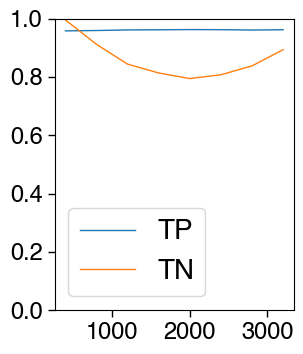

In [25]:
##Novelty detection through hippocampal states

import pickle
Npatts_lst=np.arange(1,Npos+1,400)
num_Npatts = len(Npatts_lst)

TP = np.zeros(num_Npatts)
TN = np.zeros(num_Npatts)
FP = np.zeros(num_Npatts)
FN = np.zeros(num_Npatts)

Npatts = Npos
snew = np.sign(randn(Ns, Npos))
Wps = pseudotrain_Wps(pbook, sbook, Npatts)
pin = nonlin(Wps@sbook[:,:Npatts], thresh=0)
mu = np.average(pin[0].mean(axis=0)) # approx 0.341
std = np.std(pin[0].mean(axis=0))    # approx 0.035
stdf=2.
for i in tqdm(range(num_Npatts)):
  Npatts = Npatts_lst[i]
  Wps = pseudotrain_Wps(pbook, sbook, Npatts)
  
  pin = nonlin(Wps@sbook[:,:Npatts], thresh=0)
  pnew = nonlin(Wps@snew[:,:Npatts], thresh=0)
  
  in_means = pin[0].mean(axis=0)
  new_means = pnew[0].mean(axis=0)
  
  TP[i] = sum((in_means>mu-stdf*std)*(in_means<mu+stdf*std))/Npatts
  TN[i] = sum((new_means<mu-stdf*std)+(new_means>mu+stdf*std))/Npatts
  FN[i] = sum((in_means<mu-stdf*std)+(in_means>mu+stdf*std))/Npatts
  FP[i] = sum((new_means>mu-stdf*std)*(new_means<mu+stdf*std))/Npatts

plt.figure(figsize=(3.5,4))
plt.plot(Npatts_lst[1:],TP[1:],label=('TP'));
# plt.plot(Npatts_lst[1:],FN[1:],label=('FN'));
# plt.plot(Npatts_lst[1:],FP[1:],label=('FP'));
plt.plot(Npatts_lst[1:],TN[1:],label=('TN'));
# plt.xlim(0,3600);
plt.ylim(0,1)
plt.legend()

thresh=0.5


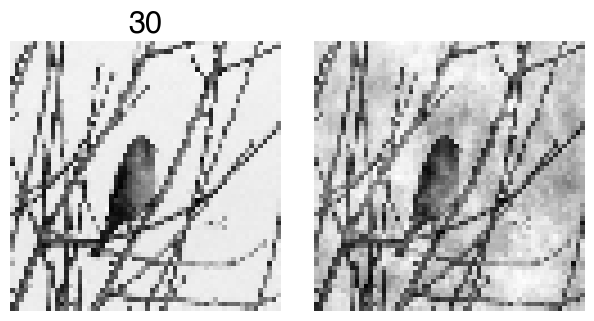

In [16]:
#Barebones code to peek in and examine states etc. (BW miniimagenet)

Np = 400
Wpg = randn(nruns, Np, Ng) #/ (np.sqrt(M));                      # fixed random gc-to-pc weights
c = 0.60     # connection probability
prune = int((1-c)*Np*Ng)
mask = np.ones((Np, Ng))
mask[randint(low=0, high=Np, size=prune), randint(low=0, high=Ng, size=prune)] = 0
Wpg = np.multiply(mask, Wpg)

thresh=0.5
#thresh=-5

print('thresh='+str(thresh))
pbook = nonlin(np.einsum('ijk,kl->ijl', Wpg, gbook), thresh)  # (nruns, Np, Npos)
Wgp = train_gcpc(pbook, gbook, Npos)

Npatts=500

sbook = np.load('../../BW_miniimagenet_3600_60_60_full_rank.npy').reshape((3600,3600)).T  
bw_mean = np.mean(sbook.flatten())
sbook = sbook - bw_mean
indices = np.concatenate([np.arange(i, 3600, 600) for i in range(600)])
sbook = sbook[:,indices]

sbookmin = np.amin(sbook); sbookmax = np.amax(sbook);
sbook_scaled = np.interp(sbook, (sbookmin, sbookmax), (-0.95, +0.95))
sbookinv = np.arctanh(sbook_scaled)
Wsp = pseudotrain_Wsp(sbookinv, pbook, Npatts)
Wps = pseudotrain_Wps(pbook, sbook, Npatts)
pin = nonlin(Wps@sbook[:,:Npatts], thresh=0)
gin = Wgp@pin
g = gridCAN_2d(gin,lambdas)
p = nonlin(Wpg@g, thresh)
sprenonlin=Wsp@p
sout_prescale = np.tanh(sprenonlin)
sout = np.interp(sout_prescale,(-0.95,+0.95),(sbookmin,sbookmax))
imgno=30
fi,ax=plt.subplots(1,2)
ax[0].imshow(sbook[:,imgno].reshape((60,60)),cmap='gray');
ax[0].set_axis_off()
ax[0].set_title(str(imgno))
ax[1].imshow(sout[0,:,imgno].reshape((60,60)),cmap='gray');
ax[1].set_axis_off()


thresh=0.5


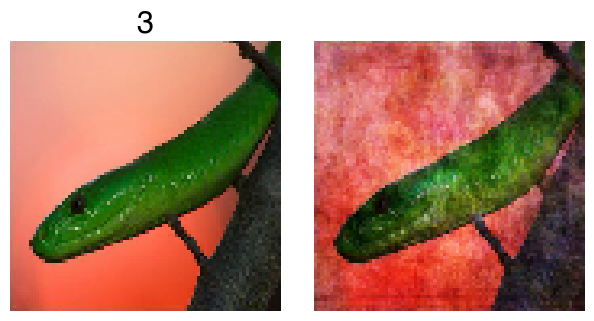

In [23]:
#Barebones code to peek in and examine states etc.  (miniimagenet)

Np = 400
Wpg = randn(nruns, Np, Ng) #/ (np.sqrt(M));                      # fixed random gc-to-pc weights
c = 0.60     # connection probability
prune = int((1-c)*Np*Ng)
mask = np.ones((Np, Ng))
mask[randint(low=0, high=Np, size=prune), randint(low=0, high=Ng, size=prune)] = 0
Wpg = np.multiply(mask, Wpg)

thresh=0.5
#thresh=-5

print('thresh='+str(thresh))
pbook = nonlin(np.einsum('ijk,kl->ijl', Wpg, gbook), thresh)  # (nruns, Np, Npos)
Wgp = train_gcpc(pbook, gbook, Npos)

Npatts=500
c_miniimagenet = np.load("miniimagenet_3600_84_84_3.npy")
sbook =c_miniimagenet.reshape((3600,84*84*3)).T
c_images_avg = np.mean(sbook.flatten())
sbook = sbook - c_images_avg
indices = np.concatenate([np.arange(i, 3600, 600) for i in range(600)])
sbook = sbook[:,indices]


sbookmin = np.amin(sbook); sbookmax = np.amax(sbook);
sbook_scaled = np.interp(sbook, (sbookmin, sbookmax), (-0.95, +0.95))
sbookinv = np.arctanh(sbook_scaled)
Wsp = pseudotrain_Wsp(sbookinv, pbook, Npatts)
Wps = pseudotrain_Wps(pbook, sbook, Npatts)
pin = nonlin(Wps@sbook[:,:Npatts], thresh=0)
gin = Wgp@pin
g = gridCAN_2d(gin,lambdas)
p = nonlin(Wpg@g, thresh)
sprenonlin=Wsp@p
sout_prescale = np.tanh(sprenonlin)
sout = np.interp(sout_prescale,(-0.95,+0.95),(sbookmin,sbookmax))
imgno=3
fi,ax=plt.subplots(1,2)
ax[0].imshow(sbook[:,imgno].reshape((84,84,3))+c_images_avg);
ax[0].set_axis_off()
ax[0].set_title(str(imgno))
ax[1].imshow(sout[0,:,imgno].reshape((84,84,3))+c_images_avg);
ax[1].set_axis_off()


In [27]:
###Baselines
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
from src.data_utils import read_pkl, write_pkl
from tqdm import tqdm as tqdm


def cap(W,bound):
    W1=np.where(W>bound,bound*np.ones(W.shape),W)
    W2=np.where(W1<-bound,-bound*np.ones(W.shape),W1)
    return W2

def corrupt_p(codebook,p=0.1,booktype='-11'):
    rand_indices = np.sign(np.random.uniform(size=codebook.shape)- p )
    if booktype=='-11':
        return np.multiply(codebook,rand_indices)
    elif booktype=='01':
        return abs(codebook - 0.5*(-rand_indices+1))
    elif booktype=='cts':
        return codebook + np.random.normal(0,1,size=codebook.shape)*p
    else:
        print("codebook should be -11; 01; or cts")
        return 0


def get_weights(patterns,connectivity):
    if connectivity is 'standard':
        if learning == 'hebbian':
            W = patts @ patts.T
        elif learning == 'sparsehebbian':
            prob = sparsity #np.sum(patts)/patts.shape[0]/patts.shape[1]
            W =(1/patts.shape[0])* (patts - prob) @ (patts.T - prob)
        elif learning == 'pinv':
            W= patts @ np.linalg.pinv(patts)
        elif learning == 'bounded_hebbian':
            num_patts = patts.shape[1]
            num_nodes = patts.shape[0]
            W = np.zeros((num_nodes,num_nodes))
            for i in range(num_patts):
                Wtmp = np.outer(patts[:,i] , patts[:,i])/np.sqrt(num_nodes)
                # ~ print(np.amax(Wtmp))
                W = cap(Wtmp + W,bound)
        W = W - np.diag(np.diag(W))
    else:
        N = connectivity.shape[0]
        W = sparse.lil_matrix(connectivity.shape)
        for i in range(N):
            for j in connectivity.rows[i]:
                W[i,j] = np.dot(patterns[i],patterns[j])
        W.setdiag(0)
    return W


def entropy(inlist):
    ent = np.zeros(len(inlist))
    for idx,x in enumerate(inlist):
        if x == 0 or x == 1:
            ent[idx] = 0
        else:
            ent[idx] = -1 * ( x*np.log2(x) + (1-x)*np.log2(1-x) )
    return ent

<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\chand\AppData\Local\Temp\ipykernel_28496\3564347232.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if connectivity is 'standard':


In [28]:
nruns=10
iterations=100

runidx = 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [02:07<00:00,  1.60s/it]


runidx = 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [02:12<00:00,  1.65s/it]


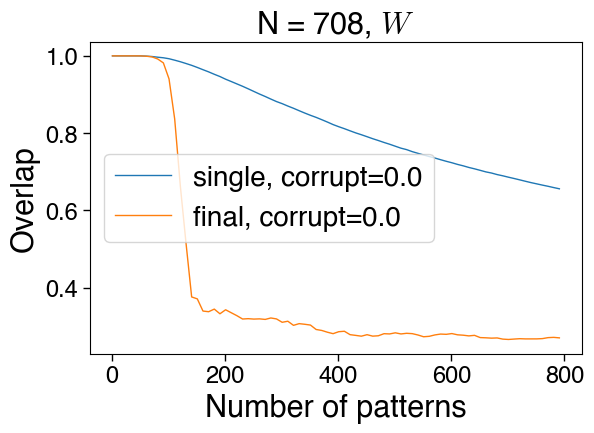

C:\Users\chand\AppData\Local\Temp\ipykernel_28496\3367553331.py:97: RuntimeWarning: divide by zero encountered in log2
  S = - a * np.log2(a) - b * np.log2(b)
C:\Users\chand\AppData\Local\Temp\ipykernel_28496\3367553331.py:97: RuntimeWarning: invalid value encountered in multiply
  S = - a * np.log2(a) - b * np.log2(b)


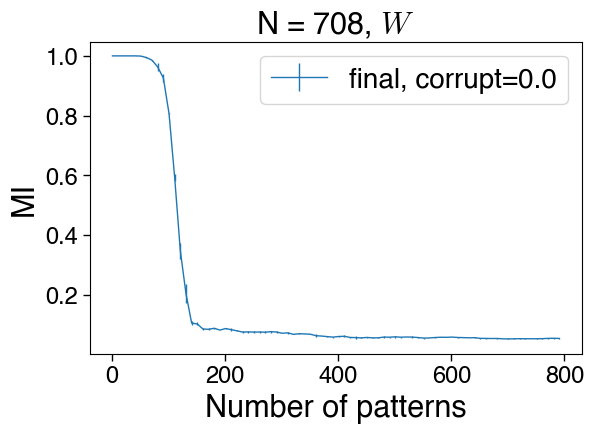

In [31]:
N = 708
corrupt_fraction = 0.0
Npatts_list = np.arange(1,800,10)
connectivity='standard' # Standard fully connected Hopfield network. For sparse connectivity use the next cell
# learning can be 'hebbian', 'bounded_hebbian', 'pinv', or 'sparsehebbian' for sparse hopfield network
learning='hebbian'
# bound=0.3  #Use bound param if learning='bounded_hebbian'

init_overlap = np.zeros((nruns,*Npatts_list.shape))
final_overlap = np.zeros((nruns,*Npatts_list.shape))
MI_hc = np.zeros((nruns,*Npatts_list.shape))


for runidx in range(nruns):
    print("runidx = "+str(runidx))
    
    if learning == 'sparsehebbian':
        # sparse hopfiled 0/1 code
        sparsity = 0.2
        patterns = 1*(np.random.rand(N,Npatts_list.max()) > (1-sparsity))
        corrupt_patts = corrupt_p(patterns,p=corrupt_fraction,booktype='01')
    else:
        patterns = np.sign(np.random.normal(0,1,(N,Npatts_list.max())))
        corrupt_patts = corrupt_p(patterns,p=corrupt_fraction,booktype='-11')


    for idx,Npatts in enumerate(tqdm(Npatts_list)):
        #print(Npatts)
        patts = patterns[:,:Npatts]
        cor_patts = corrupt_patts[:,:Npatts]
        W = get_weights(patts,connectivity)
        
        if learning == 'sparsehebbian':
            # sparse hopfield
            theta = np.sum(W-np.diag(W), axis=1)
            theta=0.05 #0.04 #0
            rep = (np.sign(W@cor_patts - theta)+1)/2            
        else:
            rep = np.sign(W@cor_patts)

        init_overlap[runidx,idx] = np.average(np.einsum('ij,ij->j',rep,patts)/N) 

        rep1 = np.copy(rep)
        for ite in range(iterations-1):
            if learning == 'sparsehebbian':
                rep = (np.sign(W@rep - theta)+1)/2
            else:
                rep = np.sign(W@rep)
            
            if np.sum(abs(rep - rep1))>0:
                rep1 = np.copy(rep)
            else:
                # print("converged at "+str(ite))
                break
        err = np.einsum('ij,ij->j',rep,patts)/N
        overlap = np.average(err) 
        final_overlap[runidx,idx] = overlap #err
        
        if learning=='sparsehebbian':
            q = np.sum(np.abs(rep), axis=0) / N  # sparse hopfield
            m = err
            p = np.sum(patts, axis=0)/patts.shape[0]
            P1e = 1 - (m/p)
            P0e = (q-m)/(1-p)
            MI_hc[runidx,idx] =  np.average( entropy(q) - ( p*entropy(P1e) + (1-p)*entropy(P0e) ) )


# print(init_overlap)
# print(final_overlap)

results_dir = "continuum_results"
# filename = f"sparseconnhopfield__mutualinfo_N={N}_noise={corrupt_fraction}_gamma={gamma}_iter={iterations}_nruns={nruns}"
filename = f"stdhopfield__mutualinfo_N={N}_noise={corrupt_fraction}_iter={iterations}_nruns={nruns}"
# filename = f"pinvhopfield__mutualinfo_N={N}_noise={corrupt_fraction}_iter={iterations}_nruns={nruns}"
# filename = f"sparsehopfield__mutualinfo_N={N}_noise={corrupt_fraction}_p={sparsity}_iter={iterations}_nruns={nruns}"
# filename = f"boundedhopfield__mutualinfo_N={N}_noise={corrupt_fraction}_bound={bound}_iter={iterations}_nruns={nruns}"


fig1 = plt.figure(1)
plt.plot(Npatts_list,init_overlap.mean(axis=0), label='single, corrupt='+str(corrupt_fraction));
plt.plot(Npatts_list,final_overlap.mean(axis=0), label='final, corrupt='+str(corrupt_fraction));
plt.legend()
plt.xlabel('Number of patterns')
plt.ylabel("Overlap");
plt.title(r"N = "+str(N)+", $W$");
plt.show()
# exit()
# fig1.savefig(f"{results_dir}/Overlap_{filename}.png")

if learning=='sparsehebbian':
    print("MI already calculated in loop")
else:
    m = final_overlap
    a = (1+m)/2
    b = (1-m)/2

    S = - a * np.log2(a) - b * np.log2(b)
    S = np.where(m==1, np.zeros_like(S), S)

    MI_hc = 1 - S


fig2 = plt.figure(1)
plt.errorbar(Npatts_list,MI_hc.mean(axis=0),yerr=MI_hc.std(axis=0), label='final, corrupt='+str(corrupt_fraction)); #plt.xscale('log'); plt.yscale('log');
plt.legend()
plt.xlabel('Number of patterns')
plt.ylabel("MI");
plt.title(r"N = "+str(N)+", $W$");
plt.show()
# fig2.savefig(f"{results_dir}/MI_{filename}.png")

data = {
    "N": N,
    "init_overlap": init_overlap,
    "m": final_overlap,
    "MI": MI_hc,
    "Npatts_list": Npatts_list,
    "noise": corrupt_fraction,
    # "q": q  #needed for sparse hebbian
    # "bound": bound #needed for bounded hopfield
}
# write_pkl(f"{results_dir}/{filename}", data)

runidx = 0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:31<00:00,  6.23s/it]


runidx = 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:50<00:00, 10.18s/it]


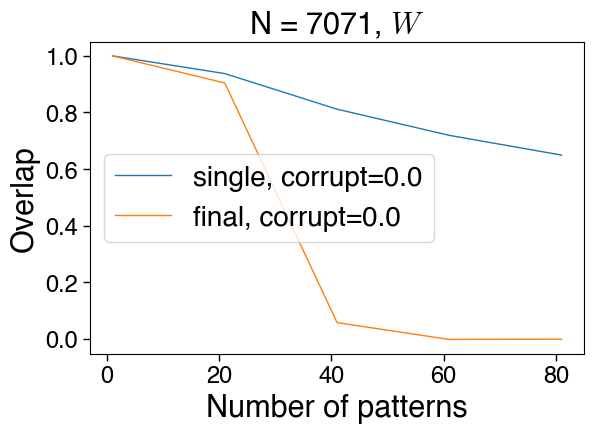

C:\Users\chand\AppData\Local\Temp\ipykernel_28496\1875080652.py:58: RuntimeWarning: divide by zero encountered in log2
  S = - a * np.log2(a) - b * np.log2(b)
C:\Users\chand\AppData\Local\Temp\ipykernel_28496\1875080652.py:58: RuntimeWarning: invalid value encountered in multiply
  S = - a * np.log2(a) - b * np.log2(b)


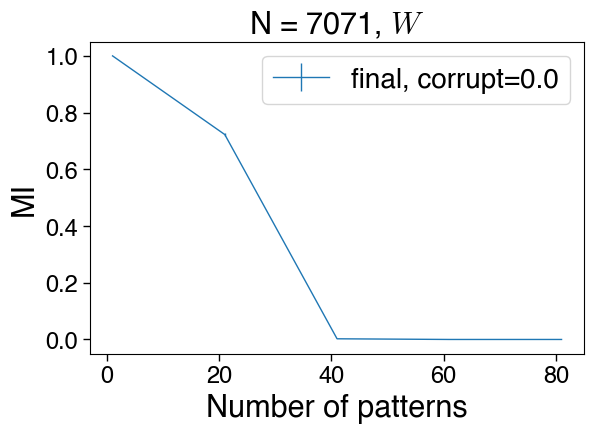

In [29]:
#Hopfield with sparse connectivity (For other variants of Hopfield model use above cell)
N = 7071
gamma = 1e-2
corrupt_fraction = 0.0
Npatts_list = np.arange(1,100,20)
connectivity = sparse.lil_matrix((N,N))
for i in range(N):
    connectivity[i,np.random.randint(0,N,int(gamma*N))] = 1

init_overlap = np.zeros((nruns,*Npatts_list.shape))
final_overlap = np.zeros((nruns,*Npatts_list.shape))
MI_hc = np.zeros((nruns,*Npatts_list.shape))

for runidx in range(nruns):
    print("runidx = "+str(runidx))
    patterns = np.sign(np.random.normal(0,1,(N,Npatts_list.max())))
    corrupt_patts = corrupt_p(patterns,p=corrupt_fraction,booktype='-11')
    for idx,Npatts in enumerate(tqdm(Npatts_list)):
        patts = patterns[:,:Npatts]
        cor_patts = corrupt_patts[:,:Npatts]
        W = get_weights(patts,connectivity)
        rep = np.sign(W@cor_patts)

        init_overlap[runidx,idx] = np.average(np.einsum('ij,ij->j',rep,patts)/N) 

        rep1 = np.copy(rep)
        for ite in range(iterations-1):
            rep = np.sign(W@rep)
            if np.sum(abs(rep - rep1))>0:
                rep1 = np.copy(rep)
            else:
                break
        err = np.einsum('ij,ij->j',rep,patts)/N
        overlap = np.average(err) 
        final_overlap[runidx,idx] = overlap #err
        
    


results_dir = "continuum_results"
filename = f"sparseconnhopfield__mutualinfo_N={N}_noise={corrupt_fraction}_gamma={gamma}_iter={iterations}_nruns={nruns}"

fig1 = plt.figure(1)
plt.plot(Npatts_list,init_overlap.mean(axis=0), label='single, corrupt='+str(corrupt_fraction));
plt.plot(Npatts_list,final_overlap.mean(axis=0), label='final, corrupt='+str(corrupt_fraction));
plt.legend()
plt.xlabel('Number of patterns')
plt.ylabel("Overlap");
plt.title(r"N = "+str(N)+", $W$");
plt.show()
#fig1.savefig(f"{results_dir}/Overlap_{filename}.png")

m = final_overlap
a = (1+m)/2
b = (1-m)/2

S = - a * np.log2(a) - b * np.log2(b)
S = np.where(m==1, np.zeros_like(S), S)

MI_hc = 1 - S


fig2 = plt.figure(1)
plt.errorbar(Npatts_list,MI_hc.mean(axis=0),yerr=MI_hc.std(axis=0), label='final, corrupt='+str(corrupt_fraction)); #plt.xscale('log'); plt.yscale('log');
plt.legend()
plt.xlabel('Number of patterns')
plt.ylabel("MI");
plt.title(r"N = "+str(N)+", $W$");
plt.show()
# fig2.savefig(f"{results_dir}/MI_{filename}.png")

data = {
    "N": N,
    "init_overlap": init_overlap,
    "m": final_overlap,
    "MI": MI_hc,
    "Npatts_list": Npatts_list,
    "noise": corrupt_fraction,
    # "q": q
    "gamma": gamma
    # "bound": bound
}
# write_pkl(f"{results_dir}/{filename}", data)